<a href="https://colab.research.google.com/github/KauaHenSilva/python_neural_networks_for_image_classification/blob/main/python_neural_networks_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import requests
import os
import zipfile
import shutil

def download_large_file_from_google_drive(file_id, destination):
    base_url = "https://drive.google.com/uc?export=download"

    with requests.Session() as session:
        response = session.get(base_url, params={'id': file_id}, stream=True)
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                confirm_token = value
                break
        else:
            confirm_token = None

        if confirm_token:
            params = {'id': file_id, 'confirm': confirm_token}
            response = session.get(base_url, params=params, stream=True)

        # Escrever o conteúdo do arquivo no destino
        with open(destination, 'wb') as f:
            for chunk in response.iter_content(32768):
                f.write(chunk)

download_large_file_from_google_drive('1j5ZM-csz4Ue6xBJPcztfJ-z7Fc6eu82n', 'homer_bart.zip')

In [2]:
if not os.path.exists('homer_bart'):
    with zipfile.ZipFile('homer_bart.zip', 'r') as zip_ref:
        zip_ref.extractall('homer_bart_temp')

    os.remove('homer_bart.zip')
    shutil.move('homer_bart_temp/homer_bart_1', 'homer_bart')
    shutil.rmtree('homer_bart_temp')

# Bibliotecas e pré-processamento

In [75]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
diretorio_imagens = './homer_bart/'
arquivos = [os.path.join(diretorio_imagens, x) for x in sorted(os.listdir(diretorio_imagens))]

In [77]:
largura, altura = 128, 128

In [78]:
images = []
classes = []

for image_caminho in arquivos:
    try:
        imagem = cv2.imread(image_caminho)
        (H, W) = imagem.shape[:2]
    except:
      continue

    imagem = cv2.resize(imagem, (largura, altura))
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    imagem = imagem.ravel()
    images.append(imagem)

    classe = os.path.basename(image_caminho)
    classe = 0 if classe.startswith('bart') else 1
    classes.append(classe)

In [79]:
X = np.array(images)
y = np.array(classes)

In [80]:
print(X.shape)
print(y.shape)

(269, 16384)
(269,)


In [81]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

# Normalizacao

In [82]:
X[0].max(), X[1].min()

(255, 0)

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0].max(), X[1].min()

(1.0000000000000002, 0.0)

# Base treinamento, base Teste.


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

In [13]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [14]:
X_test.shape, y_test.shape

((54, 16384), (54,))

# Construção é treinamento

units = (Quantidade_de_neuronios + classes) / 2




In [21]:
# 16384 -> 8193 -> 8193

network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
network1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
network1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
historico = network1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.4056 - loss: 3.0867 - val_accuracy: 0.3704 - val_loss: 2.2280
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.4029 - loss: 2.0832 - val_accuracy: 0.3704 - val_loss: 1.1298
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.5063 - loss: 0.9036 - val_accuracy: 0.6296 - val_loss: 0.6800
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5950 - loss: 0.7073 - val_accuracy: 0.6296 - val_loss: 0.6696
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5807 - loss: 0.6663 - val_accuracy: 0.6296 - val_loss: 0.6387
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6032 - loss: 0.6440 - val_accuracy: 0.7222 - val_loss: 0.6179
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7028 - loss: 0.6142 - val_accuracy: 0.6111 - val_loss: 0.6377
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7011 - loss: 0.6277 - val_accuracy: 0.6296 - val_loss: 0.6863
Epoch 9/

# Avaliação

In [30]:
historico.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Acurácia do Modelo')

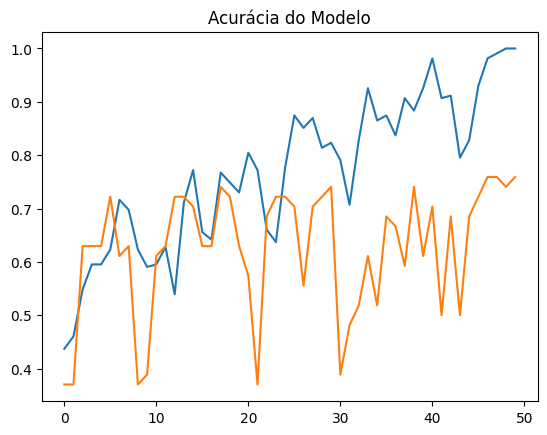

In [33]:
plt.figure()
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia do Modelo')

Text(0.5, 1.0, 'Erro')

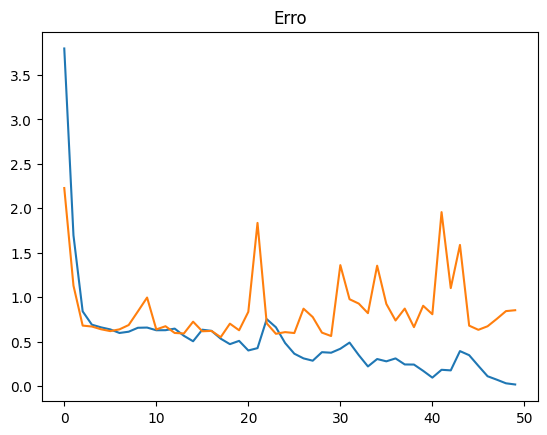

In [34]:
plt.figure()
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Erro')

In [40]:
from sklearn.metrics import classification_report

y_pred = network1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        34
           1       0.68      0.65      0.67        20

    accuracy                           0.76        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.76      0.76      0.76        54



<Axes: >

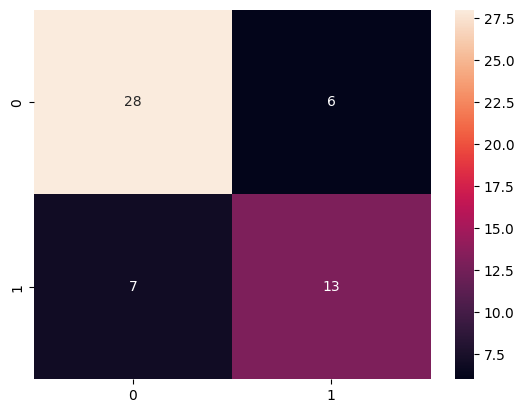

In [103]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Salvar e carregar a rede neural

In [104]:
model_json =network1.to_json()

with open('network1.json', 'w') as json_file:
  json_file.write(model_json)


In [105]:
from keras.models import save_model

network_save = save_model(network1, 'heights.keras')

In [106]:
with open('network1.json', 'r') as json_file:
  model_json = json_file.read()

network1 = tf.keras.models.model_from_json(model_json)
network1.load_weights('heights.keras')
network1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [107]:
network1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

# Classificação de uma unica imagem

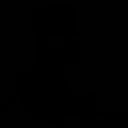

In [108]:
cv2_imshow(X_test[0].reshape(128, 128))

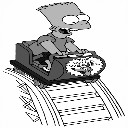

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Bart


0.069241226

In [118]:
imagem_test = X_test[34]
imagem_test = scaler.inverse_transform(imagem_test.reshape(1, -1))
cv2_imshow(imagem_test.reshape(128, 128))

resultado = network1.predict(X_test[34].reshape(1, -1))

if resultado[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

resultado[0][0]

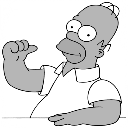

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Homer


0.9575101

In [126]:
imagem_test = X_test[12]
imagem_test = scaler.inverse_transform(imagem_test.reshape(1, -1))
cv2_imshow(imagem_test.reshape(128, 128))

resultado = network1.predict(X_test[12].reshape(1, -1))

if resultado[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

resultado[0][0]